In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('./building.jpg', cv2.IMREAD_GRAYSCALE)

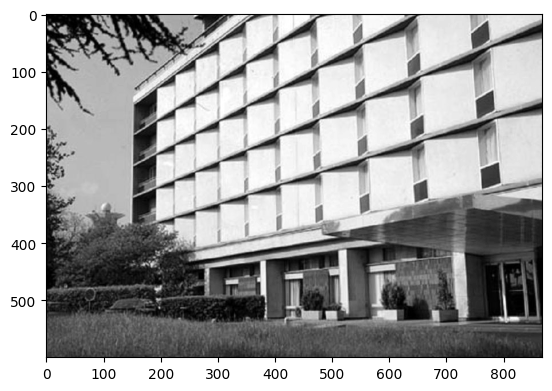

In [3]:
plt.imshow(src, cmap='gray')

In [4]:
gx = cv2.Sobel(src, cv2.CV_32F, 1, 0, ksize = 3)  # x order = 1 only 
gy = cv2.Sobel(src, cv2.CV_32F, 0, 1, ksize = 3)  # y 
print("gx:", gx.dtype, gx.shape)

gx: float32 (600, 868)


(<Axes: >, <matplotlib.image.AxesImage at 0x164515fa500>)

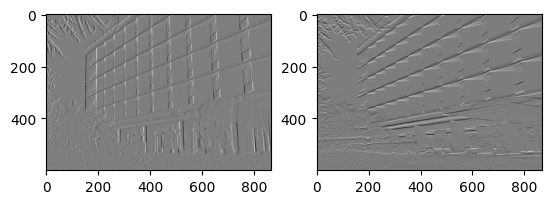

In [5]:
plt.subplot(1,2,1), plt.imshow(gx, cmap='gray')
plt.subplot(1,2,2), plt.imshow(gy, cmap='gray')

In [6]:
dstM   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dstM)
print('mag:', minVal, maxVal, minLoc, maxLoc)

mag: 0.0 771.2651977539062 (0, 0) (485, 183)


In [8]:
dstM[181:185, 484:487]

array([[375.85104, 196.1632 ,  38.     ],
       [264.51843, 401.75613, 487.44437],
       [767.57935, 771.2652 , 731.0759 ],
       [558.66266, 482.84573, 398.60757]], dtype=float32)

In [9]:
angles = np.arctan(gy/gx)

C:\Users\user\AppData\Local\Temp\ipykernel_120\376633331.py:1: RuntimeWarning: divide by zero encountered in divide
  angles = np.arctan(gy/gx)
C:\Users\user\AppData\Local\Temp\ipykernel_120\376633331.py:1: RuntimeWarning: invalid value encountered in divide
  angles = np.arctan(gy/gx)


In [10]:
angles

array([[        nan,  0.        , -0.        , ...,         nan,
         0.        ,         nan],
       [        nan, -0.7853982 ,  0.7853982 , ..., -1.3258177 ,
         1.2490457 ,         nan],
       [-1.5707964 ,  1.4801364 ,  0.90975314, ..., -1.2490457 ,
        -1.4056476 ,  1.5707964 ],
       ...,
       [-1.5707964 ,  0.17759617,  0.19739556, ..., -1.5707964 ,
         1.4801364 , -1.5707964 ],
       [ 1.5707964 ,  0.02221857,  0.2234766 , ..., -1.485291  ,
        -1.5083776 , -1.5707964 ],
       [        nan, -0.        , -0.        , ...,  0.        ,
         0.        ,         nan]], dtype=float32)

In [11]:
np.nan_to_num(angles, copy= False, nan=0.0) # replace by zero

array([[ 0.        ,  0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.7853982 ,  0.7853982 , ..., -1.3258177 ,
         1.2490457 ,  0.        ],
       [-1.5707964 ,  1.4801364 ,  0.90975314, ..., -1.2490457 ,
        -1.4056476 ,  1.5707964 ],
       ...,
       [-1.5707964 ,  0.17759617,  0.19739556, ..., -1.5707964 ,
         1.4801364 , -1.5707964 ],
       [ 1.5707964 ,  0.02221857,  0.2234766 , ..., -1.485291  ,
        -1.5083776 , -1.5707964 ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [12]:
print(cv2.minMaxLoc(angles))

(-1.5707963705062866, 1.5707963705062866, (24, 1), (183, 1))


In [15]:
angles = angles/np.pi*180.0

In [16]:
dstAngles  = np.zeros([angles.shape[0], angles.shape[1]], dtype = np.uint8)

# Quantization by conditional indexing (much faster than for-loop
dstAngles[ angles < -67.5 ] = 1
dstAngles[ (angles >= -67.5) & (angles < -22.5) ] = 2
dstAngles[ (angles >= -22.5) & (angles < 22.5)  ] = 3
dstAngles[ (angles >= 22.5)  & (angles < 67.5)  ] = 4
dstAngles[ angles >= 67.5 ] = 5

In [17]:
 
dstAngles[dstM < 30] = 0  # masking non edge

(<matplotlib.image.AxesImage at 0x1645322a620>,
 Text(0.5, 1.0, 'mag'),
 (-0.5, 867.5, 599.5, -0.5))

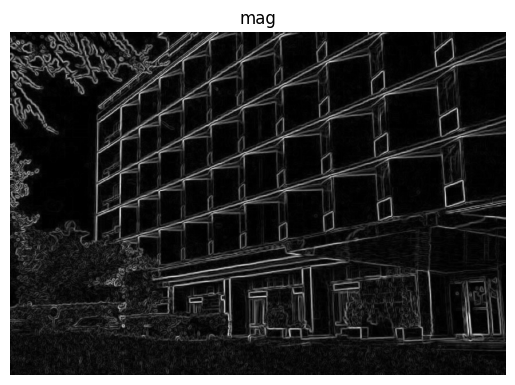

In [20]:
dstX = cv2.sqrt(gx)
dstY = cv2.sqrt(gy)
dstX = cv2.normalize(dstX, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
dstY = cv2.normalize(dstY, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
dstM = cv2.normalize(dstM, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#plt.subplot(5,2,1), plt.imshow(src, cmap ='gray'), plt.title('src'), plt.axis('off')
#plt.subplot(5,2,2), plt.imshow(dstX, cmap ='gray'), plt.title('dx'), plt.axis('off')   
#plt.subplot(5,2,3), plt.imshow(dstY, cmap ='gray'), plt.title('dy'), plt.axis('off')
#plt.subplot(5,2,4), 
plt.imshow(dstM, cmap ='gray'), plt.title('mag'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x1642edecca0>,
 Text(0.5, 1.0, 'angle > 67.5'),
 (-0.5, 867.5, 599.5, -0.5))

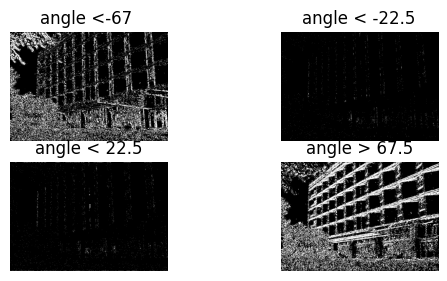

In [22]:


t = dstAngles.copy()
t[dstAngles != 1] = 0
plt.subplot(3,2,1), plt.imshow(t, cmap ='gray'), plt.title('angle <-67 '), plt.axis('off')
t = dstAngles.copy()
t[dstAngles != 2] = 0
plt.subplot(3,2,2), plt.imshow(t, cmap ='gray'), plt.title('angle < -22.5'), plt.axis('off')
t = dstAngles.copy()
t[dstAngles != 3] = 0
plt.subplot(3,2,3), plt.imshow(t, cmap ='gray'), plt.title('angle < 22.5'), plt.axis('off')
t = dstAngles.copy()
t[dstAngles != 4] = 0
plt.subplot(3,2,4), plt.imshow(t, cmap ='gray'), plt.title('angle < 67.5'), plt.axis('off')
t = dstAngles.copy()

t[dstAngles != 5] = 0
#plt.subplot(3,2,5), 
plt.imshow(t, cmap ='gray'), plt.title('angle > 67.5'), plt.axis('off')
